## Group 1:Try XGboost for Stock Market

In [ ]:
import os
import pandas as pd
import numpy as np
PATH = "."
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

df = pd.read_csv("clean_long_dataset.csv")
#/content/drive/MyDrive/Final Project/Final_Dataset/
df.head()

,date,category,name,open,high,low,close,volume,year,month,day,dayofyear,weekofyear,dayofweek,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,leadsine,ht_trendmode,add,div,max23,maxindex,min25,minindex,min27,max28,minidx,maxidx,mult,sub,sum,atan,ceil,cos,cosh,exp,floor,ln,log10,sin,sinh,sqrt,tan,tanh,adx,adxr,apo,aroondown,aroonup,aroonosc,bop,cci,cmo,dx,macd59,macdsignal60,macdhist61,macd62,macdsignal63,macdhist64,macd65,macdsignal66,macdhist67,mfi,minus_di,minus_dm,mom,plus_di,plus_dm,ppo,roc,rocp,rocr,rocr100,rsi,slowk,slowd,fastk82,fastd83,fastk84,fastd85,trix,ultosc,willr,upperband,middleband,lowerband,dema,ema,ht_trendline,kama,ma,mama,fama,midpoint,midprice,sar,sarext,sma,t3,tema,trima,wma,cdl2crows,cdl3blackcrows,cdl3inside,cdl3linestrike,cdl3outside,cdl3starsinsouth,cdl3whitesoldiers,cdlabandonedbaby,cdladvanceblock,cdlbelthold,cdlbreakaway,cdlclosingmarubozu,cdlconcealbabyswall,cdlcounterattack,cdldarkcloudcover,cdldoji,cdldojistar,cdldragonflydoji,cdlengulfing,cdleveningdojistar,cdleveningstar,cdlgapsidesidewhite,cdlgravestonedoji,cdlhammer,cdlhangingman,cdlharami,cdlharamicross,cdlhighwave,cdlhikkake,cdlhikkakemod,cdlhomingpigeon,cdlidentical3crows,cdlinneck,cdlinvertedhammer,cdlkicking,cdlkickingbylength,cdlladderbottom,cdllongleggeddoji,cdllongline,cdlmarubozu,cdlmatchinglow,cdlmathold,cdlmorningdojistar,cdlmorningstar,cdlonneck,cdlpiercing,cdlrickshawman,cdlrisefall3methods,cdlseparatinglines,cdlshootingstar,cdlshortline,cdlspinningtop,cdlstalledpattern,cdlsticksandwich,cdltakuri,cdltasukigap,cdlthrusting,cdltristar,cdlunique3river,cdlupsidegap2crows,cdlxsidegap3methods,avgprice,medprice,typprice,wclprice,beta,correl,linearreg,linearreg_angle,linearreg_intercept,linearreg_slope,stddev,tsf,var,atr,natr,trange,ad,adosc,obv,bias,ama,psy,dpo,vhf,rvi,BCI,BCTI,BDI,BDTI,BPI,BSI,NTD/USD
50000,2016-08-22,Shipping,2603.TW,10.993929,10.993929,10.902312,10.948121,1877317.0,2016.0,8.0,22.0,235.0,34.0,0.0,23.102248,28.183698,-0.040154,0.064244,0.472300,0.957237,1.0,21.896241,1.008403,11.635242,1346.0,10.948121,1368.0,10.948121,11.635242,1368.0,1346.0,119.859246,0.091616,336.139376,1.479709,11.0,-0.047435,2.842357e+04,5.684713e+04,10.0,2.393168,1.039340,-0.998874,2.842357e+04,3.308795,21.057567,1.0,18.452965,20.323987,-0.186756,50.000000,0.000000,-50.000000,-0.499995,-165.371733,-14.331357,20.566984,-0.049520,-0.026096,-0.023423,-0.186756,-0.145385,-0.041371,-0.047067,-0.024432,-0.022635,36.446649,23.060743,0.576123,-0.091616,15.193084,0.379566,-1.666929,-0.829872,-0.008299,0.991701,99.170128,42.834322,4.000010e+01,47.777866,2.000023e+01,4.000010e+01,0.000000e+00,3.764380e+01,0.056464,42.114047,-74.999790,11.051872,10.993929,10.935986,11.097747,11.083856,11.187527,11.075038,11.204646,11.019385,11.077454,11.039737,11.039737,10.872667,10.872667,11.204646,10.981833,11.021791,11.229268,11.121994,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.959573,10.948121,10.948121,10.948121,0.503309,0.956657,10.971679,-0.455691,11.075074,-0.007953,0.028971,10.963726,0.000839,0.178449,1.629950,0.091616,-1.263442e+09,-1.803217e+06,326510359.0,-0.015042,0.014475,29.166667,-0.058301,0.312500,-0.215812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50001,2016-08-23,Shipping,2603.TW,10.948121,10.993929,10.902312,10.948121,2106206.0,2016.0,8.0,23.0,236.0,34.0,1.0,23.557322,29.829664,-0.032478,0.044480,0.497423,0.965152,1.0,21.896241,1.008403,11.635242,1346.0,10.948121,1369.0,10.948121,11.635242,1369.0,1346.0,119.859246,0.091616,335.910336,1.479709,11.0,-0.047435,2.842357e+04,5.684713e+04,10.0,2.393168,1.039340,-0.998874,2.842357e+04,3.308795,21.057567,1.0,18.603966,19.897021,-0.186169,42.857143,21.428571,-21.428571,0.000000,-131.926634,-14.331357,20.566984,-0.052743,-0.031426,-0.021317,-0.186169,-0.160557,-0.025612,-0.050187,-0.029583,-0.020604,40.290574,22.184614,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 資料預處理

In [ ]:
from sklearn.model_selection import train_test_split

# 取2002.TW
steel_2002 = df[df['name']=='2002.TW'].loc[:,:'rvi']
steel_2002['close_shift_10'] = steel_2002['close'].shift(-10)
# 刪除整欄都是nan的 acos,asin 這兩欄
# steel_2002 = steel_2002.drop(['acos','asin'],axis=1)
# 刪除有nan的row
steel_2002.dropna(axis=0,inplace=True)

# 取2002.TW 的技術指標 預測 收盤價
X = steel_2002.loc[:,'year':'rvi'].values
y = steel_2002.iloc[:, -1].values
X_train, X_test, y_train, y_test =  train_test_split(X, y,
                     test_size=0.2,random_state = 1)
print("技術指標 ：",X_train)
print("收盤價 : ", y_train)


技術指標 ： [[ 2.01100000e+03  5.00000000e+00  2.00000000e+01 ...  1.17820393e-02
   3.18182061e-01  3.53438112e-02]
 [ 2.01200000e+03  9.00000000e+00  2.00000000e+01 ...  4.77622986e-01
   3.77623073e-01  2.28962684e-01]
 [ 2.01400000e+03  1.10000000e+01  1.30000000e+01 ... -1.78577596e-01
   2.27272920e-01 -9.78706402e-02]
 ...
 [ 2.01500000e+03  1.10000000e+01  6.00000000e+00 ... -2.64033578e-01
   2.69461408e-01 -1.64069338e-01]
 [ 2.01200000e+03  5.00000000e+00  8.00000000e+00 ... -1.86844045e-01
   3.08509657e-01 -5.29304564e-02]
 [ 2.01500000e+03  9.00000000e+00  1.50000000e+01 ...  2.64031670e-01
   5.03267253e-01 -2.06427853e-02]]
收盤價 :  [22.19350815 19.94940567 21.36234474 ... 16.10208702 20.33656311
 16.5291996 ]


In [ ]:
X_column_name = list(steel_2002.loc[:,'year':'rvi'].columns)

In [ ]:
steel_2002.isnull().sum()

date                   0
category               0
name                   0
open                   0
high                   0
low                    0
close                  0
volume                 0
year                   0
month                  0
day                    0
dayofyear              0
weekofyear             0
dayofweek              0
ht_dcperiod            0
ht_dcphase             0
inphase                0
quadrature             0
sine                   0
leadsine               0
ht_trendmode           0
add                    0
div                    0
max23                  0
maxindex               0
min25                  0
minindex               0
min27                  0
max28                  0
minidx                 0
maxidx                 0
mult                   0
sub                    0
sum                    0
atan                   0
ceil                   0
cos                    0
cosh                   0
exp                    0
floor                  0


## XGboost

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

xgbr = xgb.XGBRegressor(seed = 20)
xgbr.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = xgbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-y_test.shape[0]-1)

print(f'使用預設參數, 尚未調教')
print('mse: {}'.format(mse))
print('rmse: {}'.format(rmse))
print('r2: {}'.format(r2))
print('adjusted_r2: {}', format(adjusted_r2))


使用預設參數, 尚未調教
mse: 0.16289813165543257
rmse: 0.40360640685627447
r2: 0.9785779855047433
adjusted_r2: {} 11.389677030199506


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
#print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.8999999999999999}


In [ ]:
# 列出最好的參數組合
best = clf.best_estimator_
best

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.8999999999999999, colsample_bynode=1,
             colsample_bytree=0.5, gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, random_state=20, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=20, subsample=0.6, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
# 把最好的參數組合best模型，丟進去dataset
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)


best.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred_best = best.predict(X_test)




# 列出R2 與 MSE值

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)
adjusted_r2_best = 1 - (1-r2_score(y_test, y_pred_best))*(len(y_pred_best)-1)/(len(y_pred_best)-y_test.shape[0]-1)

print('mse: {}'.format(mse_best))
print('rmse: {}'.format(rmse_best))
print('r2: {}'.format(r2_best))
print('adjusted_r2: {}', format(adjusted_r2_best))

mse: 0.12741635531325804
rmse: 0.35695427622212067
r2: 0.9832440373458244
adjusted_r2: {} 9.126641887275147


## 畫圖

In [ ]:
import pandas as pd
importance=pd.DataFrame(zip(X_column_name,best.feature_importances_), columns=['feature_name','importance'])
importance= importance.sort_values("importance", ascending=False)
importance


,feature_name,importance
160,medprice,0.209863
21,minidx,0.206903
161,typprice,0.123696
83,ema,0.049833
33,log10,0.047724
25,sum,0.046241
162,wclprice,0.044610
26,atan,0.043676
32,ln,0.037274
18,minindex,0.036159


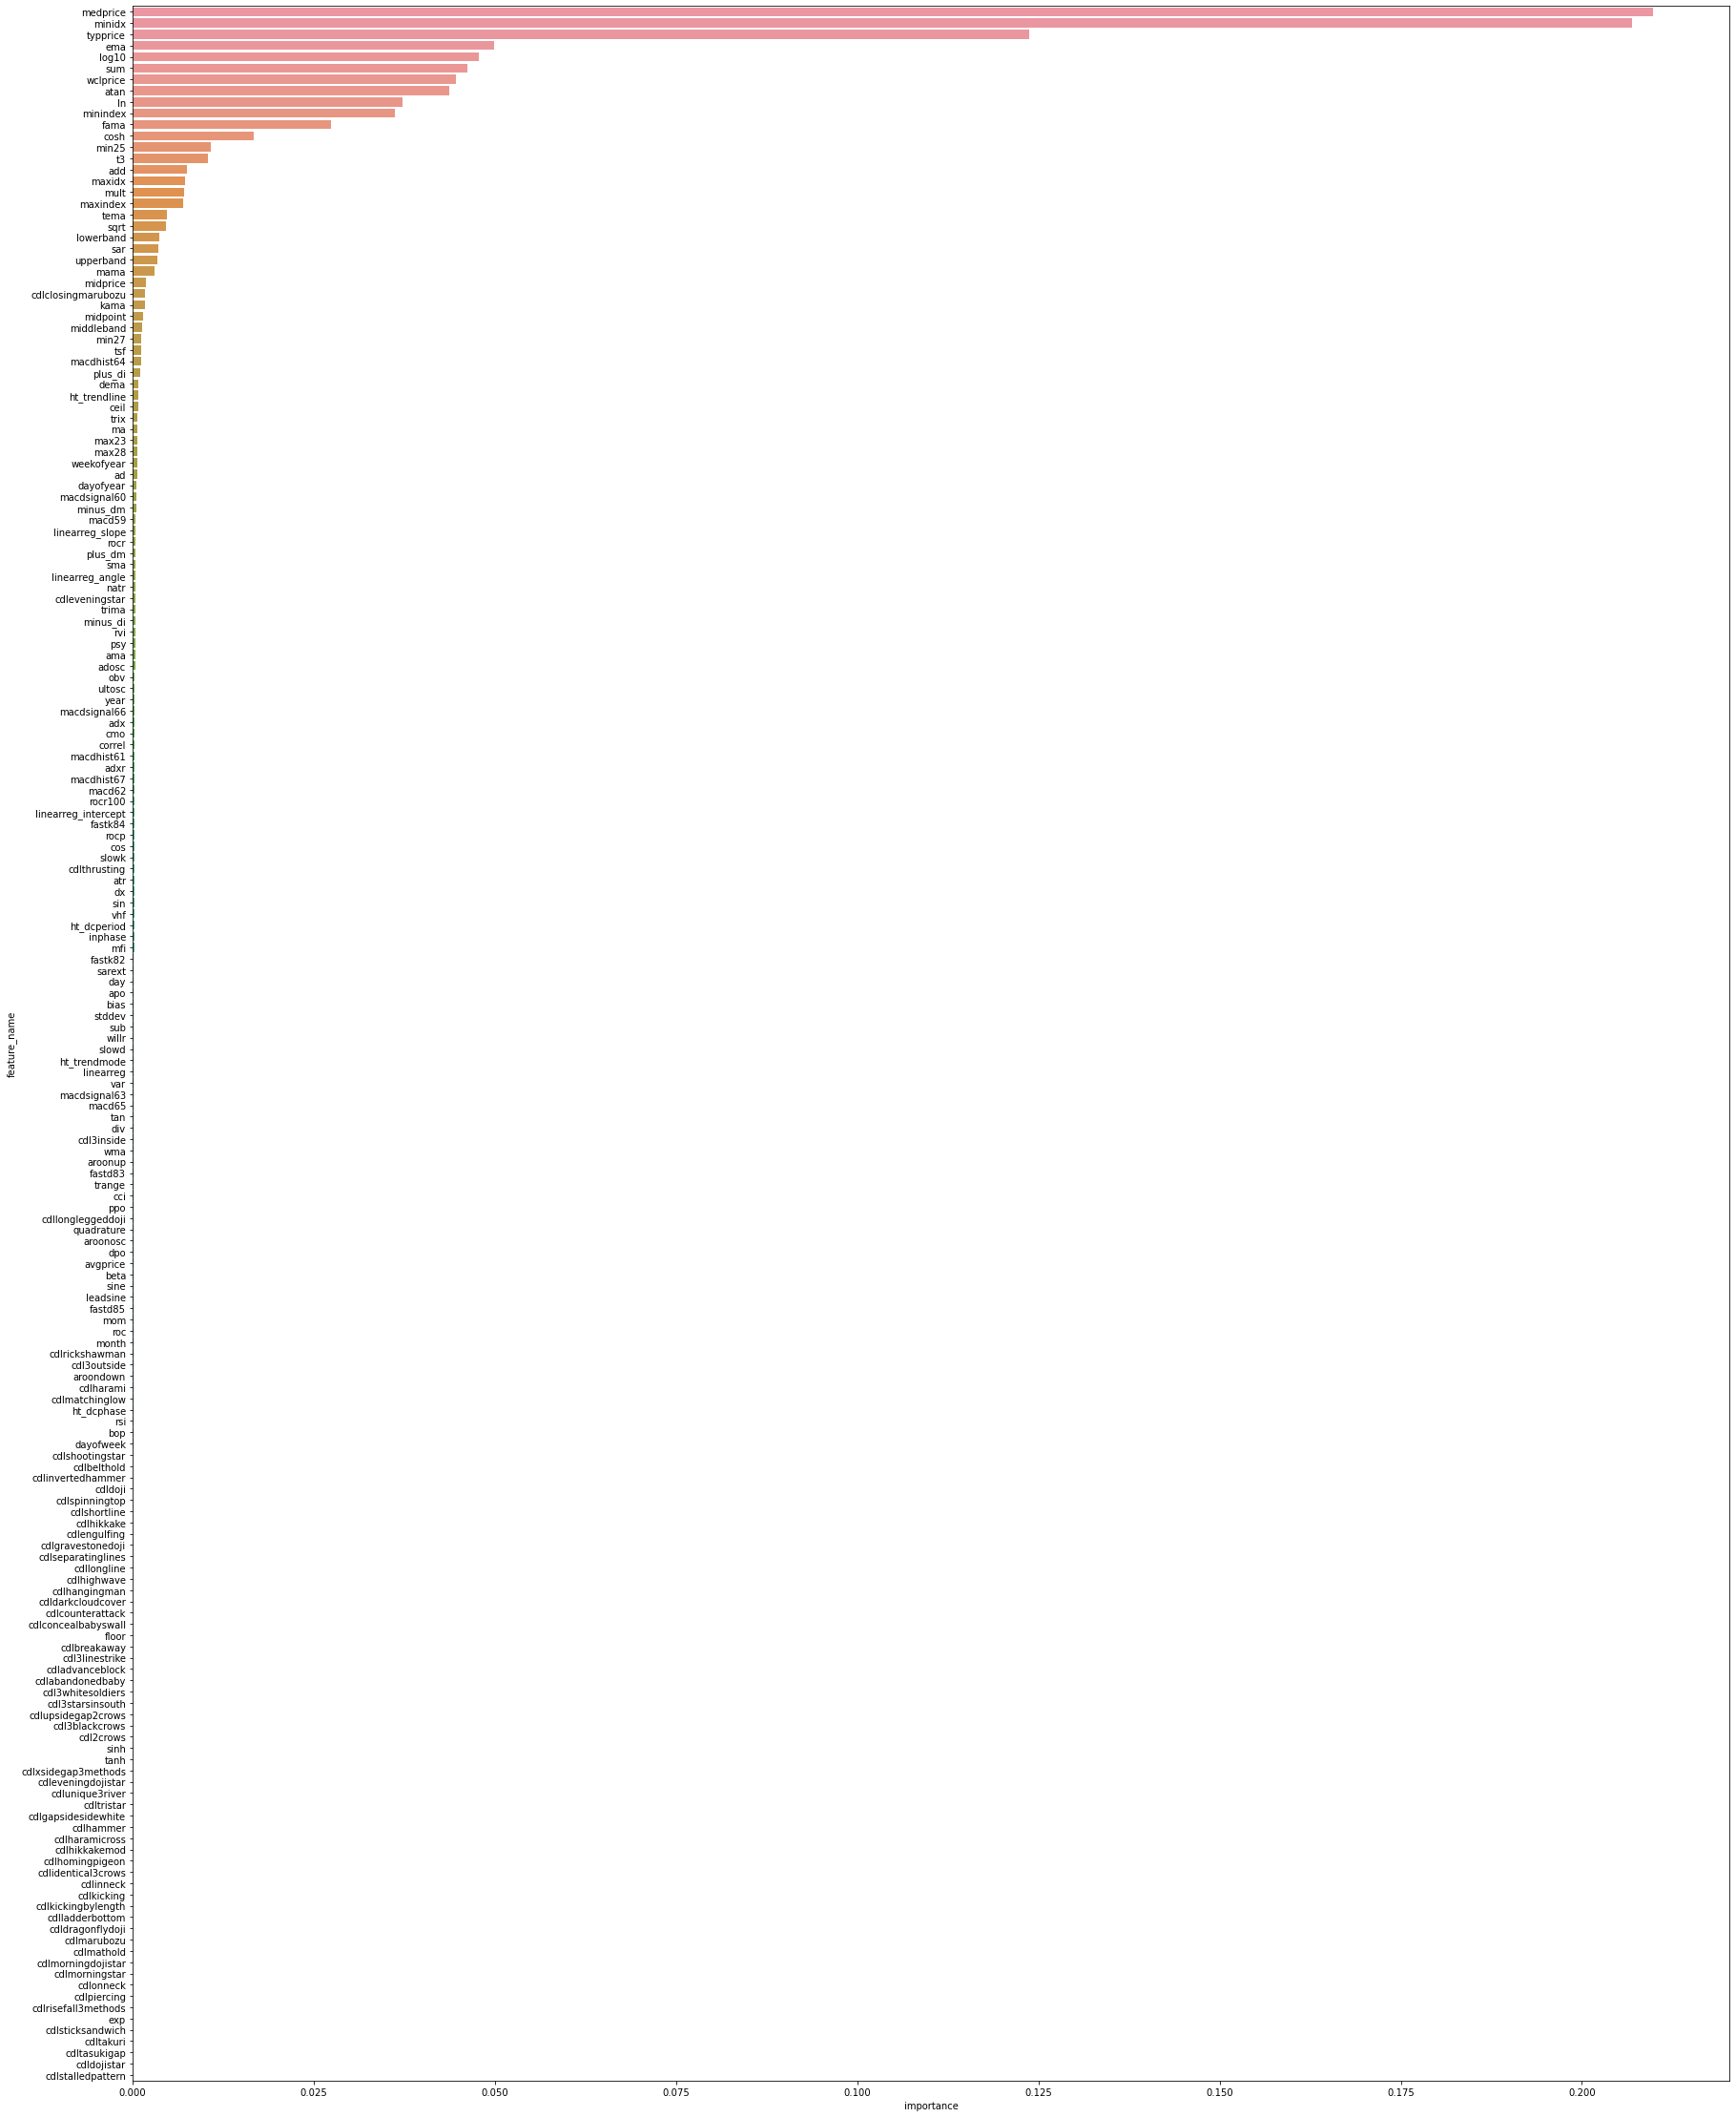

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30, 40))

sns.barplot(x="importance", y="feature_name", data=importance)
plt.savefig('importance.png')